In [18]:
import torch
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, datasets
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


train = datasets.MNIST("",train = True, download = True, transform= transforms.Compose([transforms.ToTensor()]))


test =datasets.MNIST("",train = False, download = True, transform= transforms.Compose([transforms.ToTensor()]))


trainset = torch.utils.data.DataLoader(train,batch_size =10, shuffle=True)
trainset = torch.utils.data.DataLoader(test,batch_size =10, shuffle=True)


In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)

    


net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
X = torch.rand((28,28))
X = X.view(-1,28*28)



In [22]:
output = net(X)

In [23]:
output

tensor([[-2.3494, -2.1560, -2.3209, -2.2721, -2.2438, -2.2263, -2.3699, -2.3729,
         -2.4774, -2.2744]], grad_fn=<LogSoftmaxBackward0>)

In [25]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)


EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)
        
        

tensor(0.8617, grad_fn=<NllLossBackward0>)
tensor(0.0306, grad_fn=<NllLossBackward0>)
tensor(0.1211, grad_fn=<NllLossBackward0>)


In [26]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y =data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) ==y[idx]:
                correct +=1
            total+=1
print("Accuracy:", round(correct/total,3))

Accuracy: 0.964


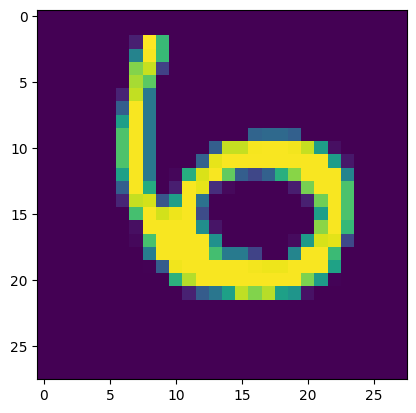

In [34]:
plt.imshow(X[4].view(28,28))
plt.show()


In [35]:
print(torch.argmax(net(X[4].view(-1,784))[0]))

tensor(6)
